In [1]:
# dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import datetime as dt
from scipy.stats import linregress

In [2]:
# read csv
inflation = pd.read_csv('resources/inflation_data.csv')
inflation.head(3)

,year,amount,inflation rate
0,1800,1.00,0.02
1,1801,1.01,0.01
2,1802,0.85,-0.16


In [3]:
# renaming column year to uppercase Y
renamedInflation=inflation.rename(columns={"year": "Year"})
renamedInflation

,Year,amount,inflation rate
0,1800,1.00,0.02
1,1801,1.01,0.01
2,1802,0.85,-0.16
3,1803,0.90,0.06
4,1804,0.94,0.04
...,...,...,...
218,2018,19.94,0.02
219,2019,20.29,0.02
220,2020,20.54,0.01
221,2021,21.51,0.05


In [4]:
# read second csv
grocery_sales = pd.read_csv('resources/Monthly Retail Sales and Trade Services - Groceries - 1992-2022.csv')
grocery_sales.head(3)

,U.S. Census Bureau,Unnamed: 1
0,Source: Monthly Retail Trade and Food Services,NaN
1,4451: Grocery Stores: U.S. Total,NaN
2,Seasonally Adjusted Sales - Monthly [Millions ...,NaN


In [5]:
#create dataframe
groceriesDF = grocery_sales.iloc[7:]
groceriesDF


,U.S. Census Bureau,Unnamed: 1
7,Jan-92,27835
8,Feb-92,27720
9,Mar-92,27848
10,Apr-92,27867
11,May-92,27987
...,...,...
374,Aug-22,NaN
375,Sep-22,NaN
376,Oct-22,NaN
377,Nov-22,NaN


In [6]:
# rename columns in new dataframe
renamedGroceries=groceriesDF.rename(columns={"U.S. Census Bureau": "Year", "Unnamed: 1": "Monthly Sales"})
renamedGroceries.head()

,Year,Monthly Sales
7,Jan-92,27835
8,Feb-92,27720
9,Mar-92,27848
10,Apr-92,27867
11,May-92,27987


In [7]:
# reset index
renamedGroceries=renamedGroceries.reset_index()
del renamedGroceries['index']
renamedGroceries.head()

,Year,Monthly Sales
0,Jan-92,27835
1,Feb-92,27720
2,Mar-92,27848
3,Apr-92,27867
4,May-92,27987


In [8]:
# check format type
renamedGroceries.dtypes

Year             object
Monthly Sales    object
dtype: object

In [9]:
#renamedGroceries['Year']=pd.to_datetime(renamedGroceries['Year'])
#renamedGroceries['Year']=pd.to_datetime(renamedGroceries['Year']).dt.strftime('%%m-%Y')
#renamedGroceries.head()

In [10]:
renamedGroceries['Year']=[dt.datetime.strptime(x,'%b-%y').strftime('%Y-%m') for x in renamedGroceries['Year']]
renamedGroceries

,Year,Monthly Sales
0,1992-01,27835
1,1992-02,27720
2,1992-03,27848
3,1992-04,27867
4,1992-05,27987
...,...,...
367,2022-08,NaN
368,2022-09,NaN
369,2022-10,NaN
370,2022-11,NaN


In [11]:
#renamedGroceries = renamedGroceries.groupby(renamedGroceries.Year.dt.year).sum()
#renamedGroceries.head(5)

In [12]:
renamedGroceries["Year"] = pd.DatetimeIndex(renamedGroceries["Year"]).year
renamedGroceries

,Year,Monthly Sales
0,1992,27835
1,1992,27720
2,1992,27848
3,1992,27867
4,1992,27987
...,...,...
367,2022,NaN
368,2022,NaN
369,2022,NaN
370,2022,NaN


In [13]:
renamedGroceries=renamedGroceries.dropna()

In [14]:
renamedGroceries["Monthly Sales"] = renamedGroceries["Monthly Sales"].astype(str).astype(int)
renamedGroceries.head(4)

/var/folders/3n/d3xwtzgd3hxgcj1r1bbqhms40000gn/T/ipykernel_49247/3689546677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renamedGroceries["Monthly Sales"] = renamedGroceries["Monthly Sales"].astype(str).astype(int)


,Year,Monthly Sales
0,1992,27835
1,1992,27720
2,1992,27848
3,1992,27867


In [15]:
sumGroceries = renamedGroceries.groupby("Year", as_index=False)["Monthly Sales"].sum()
sumGroceries["Monthly Sales"]=sumGroceries["Monthly Sales"]/10000
sumGroceries

,Year,Monthly Sales
0,1992,33.6540
1,1993,34.1481
2,1994,35.0416
3,1995,35.6763
4,1996,36.4999
5,1997,37.2752
6,1998,37.8183
7,1999,39.4318
8,2000,40.1587
9,2001,41.8561


In [16]:
# Merge two dataframes using an inner join
merge_df = pd.merge(sumGroceries, renamedInflation, on="Year", how="inner")
merge_df

,Year,Monthly Sales,amount,inflation rate
0,1992,33.6540,11.13,0.03
1,1993,34.1481,11.47,0.03
2,1994,35.0416,11.76,0.03
3,1995,35.6763,12.10,0.03
4,1996,36.4999,12.45,0.03
5,1997,37.2752,12.74,0.02
6,1998,37.8183,12.94,0.02
7,1999,39.4318,13.22,0.02
8,2000,40.1587,13.67,0.03
9,2001,41.8561,14.06,0.03


In [17]:
filteredMerge_df = merge_df.loc[merge_df["Year"] > 2004, :]
filteredMerge_df

,Year,Monthly Sales,amount,inflation rate
13,2005,45.7697,15.50,0.03
14,2006,47.2130,16.00,0.03
15,2007,49.1835,16.46,0.03
16,2008,51.0355,17.09,0.04
17,2009,51.0394,17.03,-0.00
18,2010,52.1106,17.31,0.02
19,2011,54.7622,17.85,0.03
20,2012,56.2949,18.22,0.02
21,2013,57.5985,18.49,0.01
22,2014,60.1695,18.79,0.02


In [18]:
filteredMerge_df=filteredMerge_df.rename(columns={"Monthly Sales": "Yearly Total Sales", "amount": "Dollar Value", "inflation rate": "Inflation Rate"})
filteredMerge_df

,Year,Yearly Total Sales,Dollar Value,Inflation Rate
13,2005,45.7697,15.50,0.03
14,2006,47.2130,16.00,0.03
15,2007,49.1835,16.46,0.03
16,2008,51.0355,17.09,0.04
17,2009,51.0394,17.03,-0.00
18,2010,52.1106,17.31,0.02
19,2011,54.7622,17.85,0.03
20,2012,56.2949,18.22,0.02
21,2013,57.5985,18.49,0.01
22,2014,60.1695,18.79,0.02


In [19]:
# need to update the 2022 data take (34.4909 / 5)*12 to get an estimate of total sales for 2022
filteredMerge_df.at[30,'Yearly Total Sales']=(34.4909 / 5)*12
filteredMerge_df

,Year,Yearly Total Sales,Dollar Value,Inflation Rate
13,2005,45.76970,15.50,0.03
14,2006,47.21300,16.00,0.03
15,2007,49.18350,16.46,0.03
16,2008,51.03550,17.09,0.04
17,2009,51.03940,17.03,-0.00
18,2010,52.11060,17.31,0.02
19,2011,54.76220,17.85,0.03
20,2012,56.29490,18.22,0.02
21,2013,57.59850,18.49,0.01
22,2014,60.16950,18.79,0.02


In [20]:
# Define line chart

# Set x axis to numerical value for month
x_axis_data = np.arange(2004, 2022, 1)
x_axis_data

grocery_axis = filteredMerge_df["Yearly Total Sales"]
grocery_axis

13    45.76970
14    47.21300
15    49.18350
16    51.03550
17    51.03940
18    52.11060
19    54.76220
20    56.29490
21    57.59850
22    60.16950
23    61.63400
24    62.58780
25    65.35340
26    67.18930
27    69.47590
28    75.78440
29    78.31730
30    82.77816
Name: Yearly Total Sales, dtype: float64

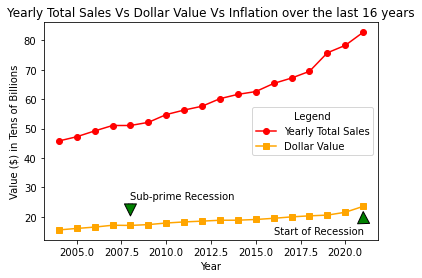

In [21]:
# Add 2 more dimensions

dollar_value_axis = filteredMerge_df["Dollar Value"]

# Plot the line
plt.plot(x_axis_data, grocery_axis, marker ='o', color='red', label="Yearly Total Sales")
plt.plot(x_axis_data, dollar_value_axis, marker ='s', color='orange', label="Dollar Value")

plt.legend(loc='right', title='Legend')
plt.xlabel("Year")
plt.ylabel("Value ($) in Tens of Billions")

plt.annotate('Sub-prime Recession', xy =(2008, 20),
                xytext =(2008, 26), 
                arrowprops = dict(facecolor ='green',
                                  shrink = 0.05),)

plt.annotate('Start of Recession', xy =(2021, 22),
                xytext =(2016, 14), 
                arrowprops = dict(facecolor ='green',
                                  shrink = 0.05),)
plt.title("Yearly Total Sales Vs Dollar Value Vs Inflation over the last 16 years")
plt.savefig("Resources/linePlot_grocerySales_DollarValue.png")

plt.show()

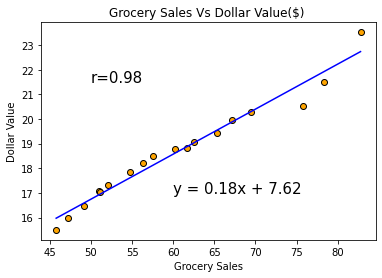

In [22]:
# Prepare scatter chart

correlation = st.pearsonr(grocery_axis, dollar_value_axis)
(slope, intercept, rvalue, pvalue, stderr) = linregress(grocery_axis, dollar_value_axis)
regress_values = grocery_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(grocery_axis, dollar_value_axis, marker="o", facecolor="orange", edgecolor="black")
plt.plot(grocery_axis,regress_values,"b-")
plt.annotate(line_eq,(60,17),fontsize=15,color="black")
r=(f"r={round(correlation[0],2)}")
plt.annotate(r,(50,21.5),fontsize=15,color="black")
plt.xlabel("Grocery Sales")
plt.ylabel("Dollar Value")
plt.title("Grocery Sales Vs Dollar Value($) ")

plt.savefig("Resources/scatter.png")